# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela (podem ser mais de uma)? Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você. Quais são as características básicas da base?*

Ex: Estou trabalhando com o histório de vendas de um varejo e uma outra base do mesmo varejista das suas campanhas de marketing realizadas em veiculos de comunicação.

**Base de dados escolhida**

Após alguns dias de pesquisa, encontrei a base abaixo a qual achei interessante, pois trata de uma questão de Saúde, tema que considero extremamente relevante para a sociedade, em especial a Diabetes, cuja a prevenção tem como um dos maiores empecilho a condição social das pessoas.

- *`Nome da base`*: Diabetes 130-US hospitals for years 1999-2008 Data Set

- *`Link drive`*: https://drive.google.com/open?id=10rtGtHs9OmtzqDFsBK5kFC7fOP7IxA1e

- *`Fonte`*: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008


A base escolhida **Diabetes 130-US hospitals** traz dados de 10 anos de atendimento (1999-2008) clínico de pacientes em 130 hospitais e redes de distribuição integradas nos EUA. A base inclui 50 atributos e 101.766 instâncias que representam os resultados dos pacientes e dos hospitais. A finalidade é prevê se um paciente portador de diabetes será readmitido em algum hospital após iniciado o tratamento. O estudo está descrito no artigo: **_Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records_** que pode ser encontrado [aqui](https://www.hindawi.com/journals/bmri/2014/781670/).

### 2) **(5%)** Que tipo de problema podemos solucionar com ela? Liste ao menos 3 hipóteses sobre seus dados, caso sua base seja muito restrita converse com os professores antes de seguir.
- Quais são suas hipoteses sobre os dados? O que vc espera descobrir com esse estudo?

Ex: Hipoteses válidas seriam:
- As pessoas fazem mais compras nos dias utéis ou finais de semana?
- Existe diferença entre o padrão de compra de segunda ou terça feira?
- O horário de pico influencia no padrão de compra dos clientes?
- Quais produtos são comprados mais juntos? Existe diferença se observarmos a idade do cliente?
- Qual o efeito de uma campanha de marketing nas vendas?


- **`Hipótese 1`**: A medição da Hemoglobina glicada está associada a uma redução nas taxas de readmissão?

- **`Hipótese 2`**: A raça e idade são fatores importantes na readmissão de um paciente?

- **`Hipótese 3`**: Quem tem diabetes como primeiro diagnóstico tem menos chances de ser readmitido? 

### 3) **(20%)** Preparação de dados

Hora de deixar a base perfeita para se trabalhar. Limpe os dados, integre com outras fontes e transforme-o para ficar pronto para se trabalhar! No fim, mostre um antes e depois de seu dataframe.

### Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

%run modules/data.py

print(f'Versão Pandas: {pd.__version__}')
print(f'Versão Numpy: {np.__version__}')

Versão Pandas: 1.0.3
Versão Numpy: 1.18.2


### Bibliotecas de visualização

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use(['seaborn-dark-palette'])

print(f'Versão Seaborn: {sns.__version__}')
print(f'Versão Matplotlib: {matplotlib.__version__}')

Versão Seaborn: 0.10.1
Versão Matplotlib: 3.2.1


### Dicionário dos dados

**`encounter_id (numérico)`**: identificador único de um encontro.

**`patient_nbr (numérico)`**: identificador único de um paciente.

**`race (nominal)`**: raça do paciente (Caucasian, Asian, African American, Hispanic and other).

**`gender (nominal)`**: gênero do paciente (male, female and unknown/invalid).

**`age (nominal)`**: idade do paciente agrupada em intervalos de 10 anos: [0, 10), [10, 20), ..., [90, 100).

**`weight (nominal)`**: peso do paciente (agrupado) em libras.

**`admission_type_id (numérico)`**: tipo de admissão correspondente a 9 valores distintos (emergency, urgent, elective, newborn, not available, etc.).

**`discharge_disposition_id (numérico)`**: código de status da alta hospitalar (local ou status antecipado da pessoa após o encontro) correspondente a 29 valores distintos (discharged to home, expired, not available, etc.).

**`admission_source_id (numérico)`**: fonte de admissão do paciente correspondente a 21 valores distintos (physician referral, emergency room, transfer from a hospital, etc.).

**`time_in_hospital (numérico)`**: tempo do paciente no hospital (número de dias entre a internação e a alta hospitalar).

**`payer_code (nominal)`**: código do pagador correspondente a 23 valores distintos (blue Cross, blue Shield, medicare, self-pay Medical, etc.).

**`medical_specialty (nominal)`**: especialidade médica do médico admitidor correspondendo a 84 valores distintos (cardiology, internal medicine, family/general practice, etc.).

**`num_lab_procedures (numérico)`**: número de testes de laboratório realizados durante o encontro.

**`num_procedures (numérico)`**: número de procedimentos (exceto testes de laboratório) realizados durante o encontro.

**`num_medications (numérico)`**: número de nomes genéricos distintos administrados durante o encontro.

**`number_outpatient (numérico)`**: número de consultas ambulatoriais do paciente no ano anterior ao encontro.

**`number_emergency (numérico)`**: número de visitas de emergência do paciente no ano anterior ao encontro.

**`number_inpatient (numérico)`**: número de visitas de internação do paciente no ano anterior ao encontro.

**`diag_1 (nominal)`**: diagnóstico primário (codificado como três primeiros dígitos da ICD9).

**`diag_2 (nominal)`**: diagnóstico secundário (codificado como três primeiros dígitos da ICD9).

**`diag_3 (nominal)`**: diagnóstico adicional.

**`number_diagnoses (numérico)`**: número de diagnósticos inseridos no sistema.

**`max_glu_serum (nominal)`**: Teste sérico de glicose (diagnostica e monitora o diabetes). Indica o intervalo do resultado ou se o teste não foi realizado ("> 200", "> 300", "normal" e "none").

**`A1Cresult (nominal)`**: Teste de hemoglobina glicada (avalia o controle glicêmico e confirma o diagnóstico de diabetes ou de pré-diabetes). Indica o intervalo do resultado ou se o teste não foi realizado (">8", ">7", "normal" e "none").

**`23 features for medications (nominal)`**: para os nomes genéricos: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone**. O recurso indica se o medicamento foi prescrito ou se houve uma alteração na dosagem ("up" se a dose foi aumentada durante o encontro, "down" se a dose foi diminuída, "steady" se a dose não mudou e "no" se o medicamento não foi prescrito).

**`readmitted (nominal)`**: dias para readmissão hospitalar ("<30" se readmitido em menos de 30 dias, "> 30" se readmitido em mais de 30 dias e "Np" para nenhum registro de readmissão).

**`change (nominal)`**: indica se houve uma alteração (dosagem ou nome genérico) nos medicamentos para diabéticos ("ch" e "No").

**`diabetesMed (nominal)`**: indica se houve algum medicamento diabético prescrito ("yes" e "no").

### Carregamento dos dados

In [3]:
data_orig = pd.read_csv('dataset_diabetes/diabetic_data.csv')

### Cópia dos dos dados

In [4]:
data = data_orig.copy()

### Características dos dados

In [5]:
data.replace('?', np.nan, inplace=True)
data.replace('Unknown/Invalid', np.nan, inplace=True)
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,6,1,1,1,1,2,3,1,2,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3
admission_source_id,1,7,7,7,7,2,2,7,4,4
time_in_hospital,1,3,2,2,1,3,4,5,13,12


In [6]:
print(f'Linhas: {data.shape[0]} | Colunas: {data.shape[1]}')

Linhas: 101766 | Colunas: 50


In [7]:
print(f'Colunas presentes: {data.columns.values}')

Colunas presentes: ['encounter_id' 'patient_nbr' 'race' 'gender' 'age' 'weight'
 'admission_type_id' 'discharge_disposition_id' 'admission_source_id'
 'time_in_hospital' 'payer_code' 'medical_specialty' 'num_lab_procedures'
 'num_procedures' 'num_medications' 'number_outpatient' 'number_emergency'
 'number_inpatient' 'diag_1' 'diag_2' 'diag_3' 'number_diagnoses'
 'max_glu_serum' 'A1Cresult' 'metformin' 'repaglinide' 'nateglinide'
 'chlorpropamide' 'glimepiride' 'acetohexamide' 'glipizide' 'glyburide'
 'tolbutamide' 'pioglitazone' 'rosiglitazone' 'acarbose' 'miglitol'
 'troglitazone' 'tolazamide' 'examide' 'citoglipton' 'insulin'
 'glyburide-metformin' 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone' 'change' 'diabetesMed'
 'readmitted']


In [8]:
print(f'Tipos dos dados:\n{data.dtypes.unique()}')

Tipos dos dados:
[dtype('int64') dtype('O')]


### Estatística dos dados

In [9]:
data.drop(['encounter_id', 
           'patient_nbr', 
           'admission_type_id', 
           'discharge_disposition_id', 
           'admission_source_id'], axis=1).describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [10]:
data[['race', 
      'gender', 
      'age', 
      'weight', 
      'change', 
      'diabetesMed', 
      'readmitted', 
      'diag_1', 
      'diag_2', 
      'diag_3']].describe(include='O')

,race,gender,age,weight,change,diabetesMed,readmitted,diag_1,diag_2,diag_3
count,99493,101763,101766,3197,101766,101766,101766,101745,101408,100343
unique,5,2,10,9,2,2,3,716,748,789
top,Caucasian,Female,[70-80),[75-100),No,Yes,NO,428,276,250
freq,76099,54708,26068,1336,54755,78363,54864,6862,6752,11555


### Profile report

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
report= data.profile_report(title='Relatório geral dos dados', 
                            sort='None', 
                            html={'style':{'full_width': True}}, 
                            progress_bar=False
                           )
report.to_notebook_iframe()

### Tratando valores nulos

In [11]:
import missingno as msno

In [12]:
data_missing = pd.DataFrame({'nomes': data.columns, 
                             'tipos': data.dtypes, 
                             'NA #': data.isna().sum(),
                             'NA %': (data.isna().sum() / data.shape[0]) * 100
                            })

data_missing[data_missing['NA #'] > 0].set_index('nomes')

,tipos,NA #,NA %
nomes,,,
race,object,2273,2.233555
gender,object,3,0.002948
weight,object,98569,96.858479
payer_code,object,40256,39.557416
medical_specialty,object,49949,49.082208
diag_1,object,21,0.020636
diag_2,object,358,0.351787
diag_3,object,1423,1.398306


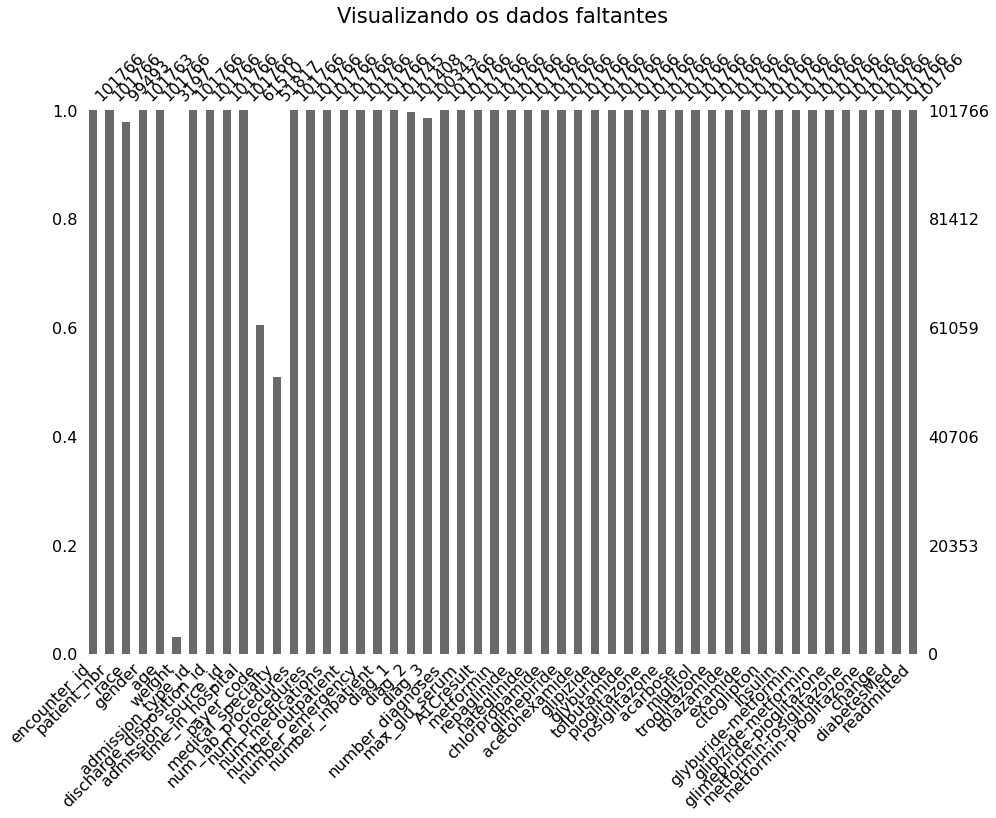

In [13]:
msno.bar(data, figsize=[15, 10])
plt.title('Visualizando os dados faltantes', y=1.15, size=21)
plt.show()

#### Correlação de nulidade

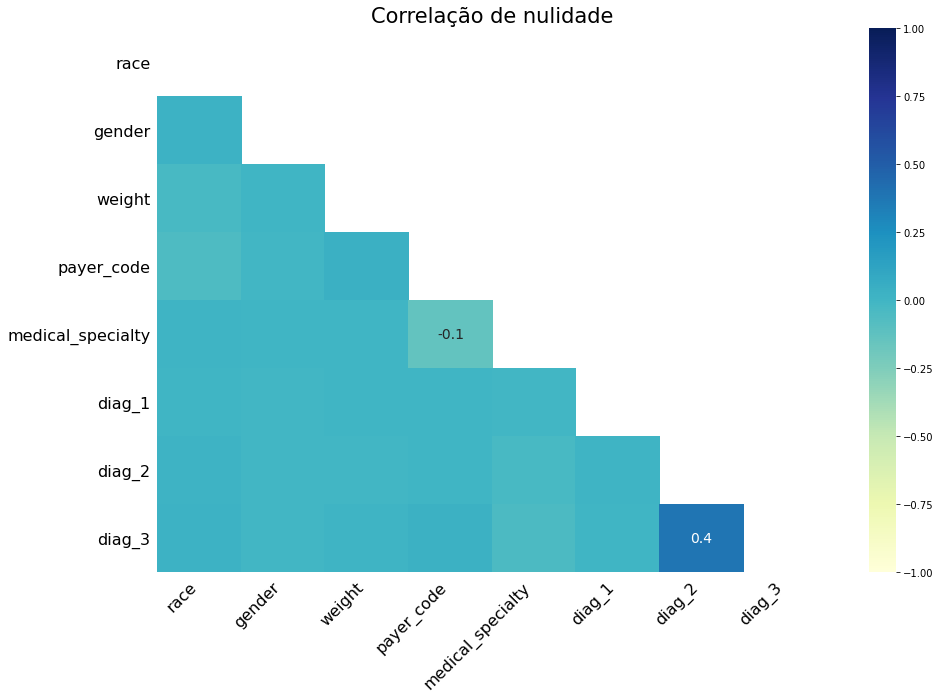

In [14]:
msno.heatmap(data, figsize=[15, 10], cmap='YlGnBu')
plt.title('Correlação de nulidade', y=1.15, size=21)
plt.show()

#### Drop nas colunas com valores altos de nulos

In [15]:
data.drop(['weight', 'payer_code'], axis=1, inplace=True)

#### Substituição pela moda nas demais colunas

In [16]:
cols= ['race', 'diag_1', 'diag_2', 'diag_3', 'gender']
for c in cols:
    data[c].fillna(data[c].mode()[0], inplace=True)

In [17]:
data['medical_specialty'].fillna('Missing', inplace=True)

### Localizando outliers

- LOF (k)~ 1: semelhante aos vizinhos.
- LOF (k)< 1: inlier.
- LOF (k)> 1: outlier.

In [18]:
from sklearn.neighbors import LocalOutlierFactor

clf_outliers= LocalOutlierFactor(n_neighbors=3)
data['is_outlier']= clf_outliers.fit_predict(data[[c for c in data.columns if data[c].dtypes != 'O']])

count= data.query('is_outlier>1').count()
print(f'Total de outliers identificados: {sum(count)}')

Total de outliers identificados: 0


### Pré-processamento dos dados

In [19]:
data.dropna(inplace=True)

#### Mapeamento das colunas

In [20]:
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1}).astype(int)
data['race'] = data['race'].map({'Caucasian': 0, 'AfricanAmerican': 1, 'Hispanic': 2, 'Other': 3, 'Asian': 4}).astype(int)

In [21]:
data['change'] = data['change'].map({'No': 0, 'Ch': 1}).astype(int)
data['diabetesMed'] = data['diabetesMed'].map({'No': 0, 'Yes': 1}).astype(int)

In [22]:
cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
        'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
        'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
        'metformin-rosiglitazone', 'metformin-pioglitazone']

for c in cols:
    data[c] = data[c].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}).astype(int)

In [23]:
data['A1Cresult'] = data['A1Cresult'].map({'None': 0, '>8': 1, 'Norm': 2, '>7': 3}).astype(int)
data['max_glu_serum'] = data['max_glu_serum'].map({'None': 0, 'Norm': 1, '>200': 2, '>300': 3}).astype(int)

#### Removendo medicamentos que não foram receitados para nenhum paciente, uma vez que não fornecem informações significativas.

In [24]:
data.drop(['examide', 'citoglipton', 'glimepiride-pioglitazone'], axis=1, inplace=True)

### Remoção de registros do mesmo paciente

In [25]:
duplicated = data['patient_nbr'].duplicated().sum()
print(f'Total de registros do mesmo paciente: {duplicated}')

Total de registros do mesmo paciente: 30248


In [26]:
data.drop_duplicates(subset='patient_nbr', keep='first', inplace=True)
print(f'Linhas: {data.shape[0]} | Colunas: {data.shape[1]}')

Linhas: 71518 | Colunas: 46


### Remoção dos pacientes que faleceram ou que estão em cuidados paliativos

In [27]:
data=data[~data['discharge_disposition_id'].isin([11, 13, 14, 19, 20])]
print(f'Linhas: {data.shape[0]} | Colunas: {data.shape[1]}')

Linhas: 69973 | Colunas: 46


### Remoção dos Ids do conjunto de dados

In [28]:
data.drop(['encounter_id', 
           'patient_nbr', 
           'admission_type_id', 
           'discharge_disposition_id', 
           'admission_source_id',
           'is_outlier'], inplace=True, axis=1)

In [29]:
data.reset_index(drop=True, inplace=True)

### Engenharia de recursos

#### Quantidade de utilização do serviços hospitalares

In [30]:
data['use_hospital_services'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

#### Número de alterações do medicamento

In [31]:
cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
        'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin',
        'glyburide-metformin', 'glipizide-metformin', 'metformin-rosiglitazone', 'metformin-pioglitazone']

for c in cols:
    name_cols = str(c)+'_is_change'
    data[name_cols] = data[c].apply(lambda x : 0 if(x==0 or x==1) else 1)

In [32]:
data['total_changes'] = 0

for c in cols:
    name_cols = str(c)+'_is_change'
    data['total_changes'] = data['total_changes'] + data[name_cols]
    del data[name_cols]

#### Covertendo a idade para um ponto médio da categoria de idades usando mediana

In [33]:
age = {
    '[0-10)':  int(np.median(np.arange(0, 11, 1))),
    '[10-20)': int(np.median(np.arange(10, 21, 1))), 
    '[20-30)': int(np.median(np.arange(20, 31, 1))),
    '[30-40)': int(np.median(np.arange(30, 41, 1))),
    '[40-50)': int(np.median(np.arange(40, 51, 1))),
    '[50-60)': int(np.median(np.arange(50, 61, 1))),
    '[60-70)': int(np.median(np.arange(60, 71, 1))),
    '[70-80)': int(np.median(np.arange(70, 81, 1))),
    '[80-90)': int(np.median(np.arange(80, 91, 1))),
    '[90-100)':int(np.median(np.arange(90, 101, 1)))
}

data['median_ages'] = data['age'].map(age)

#### Categorização dos diagnósticos

- **`Fonte:`** Artigo: Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records

![title](img/table_diagnosis.png)

#### 1: Circulatory | 2: Respiratory | 3: Digestive | 4: Diabetes | 5: Injury | 6: Musculoskeletal | 7: Genitourinary | 8: Neoplasms | 9: Other

In [34]:
data['categories_diag_1'] = data['diag_1']
data['categories_diag_2'] = data['diag_2']
data['categories_diag_3'] = data['diag_3']

In [35]:
data.loc[data['diag_1'].str.contains('V'), ['categories_diag_1']] = 0
data.loc[data['diag_2'].str.contains('V'), ['categories_diag_2']] = 0
data.loc[data['diag_3'].str.contains('V'), ['categories_diag_3']] = 0

data.loc[data['diag_1'].str.contains('E'), ['categories_diag_1']] = -1
data.loc[data['diag_2'].str.contains('E'), ['categories_diag_2']] = -1
data.loc[data['diag_3'].str.contains('E'), ['categories_diag_3']] = -1

In [36]:
data['categories_diag_1'] = data['categories_diag_1'].astype(float)
data['categories_diag_2'] = data['categories_diag_2'].astype(float)
data['categories_diag_3'] = data['categories_diag_3'].astype(float)

In [37]:
convertDiagnosis(data, 'categories_diag_1')
convertDiagnosis(data, 'categories_diag_2')
convertDiagnosis(data, 'categories_diag_3')

data['categories_diag_1'] = data['categories_diag_1'].astype(int)
data['categories_diag_2'] = data['categories_diag_2'].astype(int)
data['categories_diag_3'] = data['categories_diag_3'].astype(int)

### Antes

In [ ]:
print(f'Linhas: {data_orig.shape[0]} | Colunas: {data_orig.shape[1]}\n')
data_orig.head(5).T

### Depois

In [38]:
print(f'Linhas: {data.shape[0]} | Colunas: {data.shape[1]}\n')
data.head(5).T

Linhas: 69973 | Colunas: 46



,0,1,2,3,4
race,0,0,1,0,0
gender,0,0,0,1,1
age,[0-10),[10-20),[20-30),[30-40),[40-50)
time_in_hospital,1,3,2,2,1
medical_specialty,Pediatrics-Endocrinology,Missing,Missing,Missing,Missing
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8
number_outpatient,0,0,2,0,0
number_emergency,0,0,0,0,0


### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2. Ao investigar a hipótese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

#### Distribuição da variável alvo readmitted

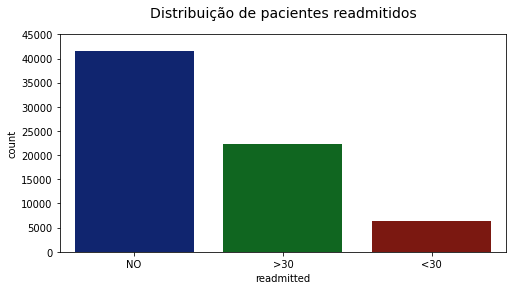

In [48]:
sns.countplot(data['readmitted'])
plt.rcParams['figure.figsize'] = [8, 4]
plt.title('Distribuição de pacientes readmitidos', y=1.05, size=14)
plt.ylim(0, 45000)
plt.show()

Percebe-se um desequilíbrio entre as classes, uma vez que o número de pacientes **não readmitidos** é maior (~60%).

#### Tempo no hospital vs. readmissão

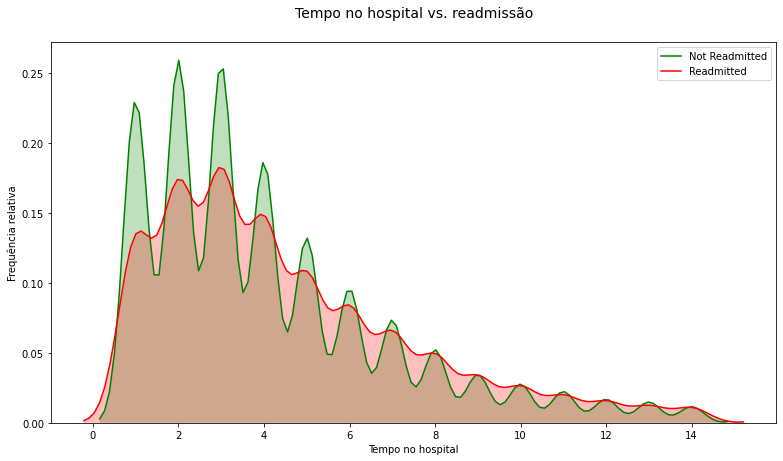

In [108]:
ax=sns.kdeplot(data.loc[(data['readmitted'] == 'NO'),'time_in_hospital'] , color='g', shade=True, label='Not Readmitted')
ax=sns.kdeplot(data.loc[(data['readmitted'] != 'NO'),'time_in_hospital'] , color='r', shade=True, label='Readmitted')
ax.set(xlabel='Tempo no hospital', ylabel='Frequência relativa')
plt.rcParams['figure.figsize'] = [13, 7]
plt.title('Tempo no hospital vs. readmissão', y=1.05, size=14)
plt.show()

A medida que o tempo no hospital aumenta, a distribuição de admitidos e não admitidos se torna mais próxima.

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

***---> Comente brevemente sua decisão aqui.***

#### Amostragem extratificada para nivelar as classes

In [49]:
data['readmitted'].value_counts()

NO     59.271433
>30    31.757964
<30     8.970603
Name: readmitted, dtype: float64

In [ ]:
sample = data.groupby(['readmitted']).apply(lambda x : x.sample(n=6293, replace=False))
sample['readmitted'].value_counts()

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


***---> Comente brevemente sua decisão aqui.***

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*